In [ ]:
In this project, we implement the Naïve Bayes classification algorithm to predict the species of a flower using the Iris dataset.
The dataset contains four features—sepal length, sepal width, petal length, and petal width—and the target variable is the flower species, 
which has three classes (Setosa, Versicolor, Virginica). This makes the problem a multiclass classification task.

Before understanding Naïve Bayes, it is important to know the foundation it is built upon: Bayes’ Theorem, which is used to calculate the 
probability of an event based on prior knowledge of related events. Bayes’ Theorem forms the core mathematical principle behind many 
probabilistic machine learning models.

Naïve Bayes is closely related to other probabilistic classification methods, but it makes one key assumption:
all features are independent of each other (the “naïve” assumption).

The algorithm works by calculating the probability of each class based on the input features and selecting the class with the highest probability.
Since the output variable (species) contains multiple categories, Naïve Bayes is ideal for solving this type of problem.

After training the model, a confusion matrix is used to evaluate performance by computing metrics such as Accuracy, Precision, Recall, TP, FP, 
TN, and FN, which help us understand how well the model distinguishes between the three flower species.

In [1]:
import pandas as pd  
# pandas is used for loading and handling the dataset (reading iris.csv, dataframes)
from sklearn.model_selection import train_test_split  
# train_test_split is used to split the dataset into training and testing parts
from sklearn.naive_bayes import GaussianNB  
# GaussianNB is the Naïve Bayes classifier suitable for continuous numeric features (like iris dataset)
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  
# These functions help calculate evaluation metrics:
# confusion_matrix → gives TP, TN, FP, FN
# accuracy_score → overall accuracy of model
# precision_score → how many predicted positives are actually positive
# recall_score → how many actual positives are correctly predicted

In [7]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\Iris.csv")  
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
x = df.drop("Species", axis=1)  
# Removes the "Species" column from the dataset and stores all feature columns in X.
# axis=1 → means drop the column (not a row).

In [11]:
y = df["Species"]
# Selects only the "Species" column.
# This column is the target variable (output) that the model will predict.

In [27]:
# Splitting the dataset into training and testing sets (80% training, 20% testing)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)

# Creating a Naive Bayes model object (GaussianNB is used for continuous data)
model = GaussianNB()

# Training the Naive Bayes classifier using the training data
model.fit(xtrain, ytrain)

# Predicting the class labels for the test dataset
y_predict = model.predict(xtest)

# Creating the confusion matrix to evaluate how many predictions were correct/incorrect
cm = confusion_matrix(ytest, y_predict)
print(cm)

# Extracting each value from the confusion matrix
print("\nTP :", cm[0][0])   # True Positive: correctly predicted class 1
print("FN :", cm[0][1])    # False Negative: class 1 predicted as class 2
print("FP :", cm[1][0])    # False Positive: class 2 predicted as class 1
print("TN :", cm[1][1], "\n")  # True Negative: correctly predicted class 2

# Calculating evaluation metrics
accuracy = accuracy_score(ytest, y_predict)     
error_rate = 1 - accuracy                      
precision = precision_score(ytest, y_predict, average='macro')  
recall = recall_score(ytest, y_predict, average='macro')     

print("\nAccuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

TP : 10
FN : 0
FP : 0
TN : 9 


Accuracy: 1.0
Error Rate: 0.0
Precision: 1.0
Recall: 1.0


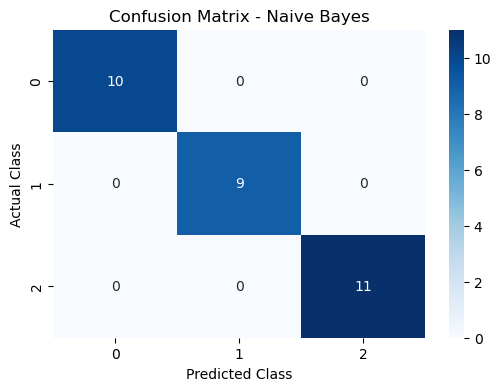

In [30]:
#Confusion Matrix Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

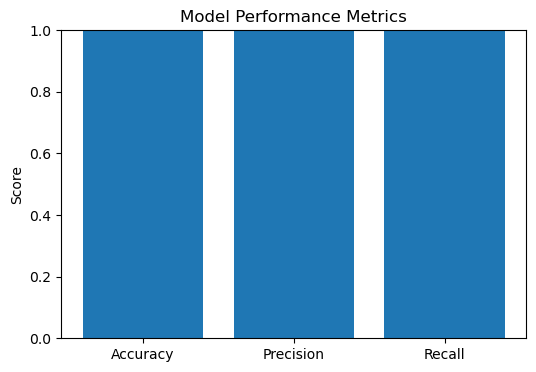

In [32]:
#Accuracy, Precision, Recall Bar Graph 
#Plotting performance metrics
metrics = ['Accuracy', 'Precision', 'Recall']
values = [accuracy, precision, recall]

plt.figure(figsize=(6,4))
plt.bar(metrics, values)
plt.ylim(0, 1)
plt.title("Model Performance Metrics")
plt.ylabel("Score")
plt.show()